# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### Imagine that a person makes a doctor appointment, receives all the instructions and no-show. Who to blame? This is a big issue and we are here in order to analyze it and find how we can solve it 

> This dataset collects information from 110.527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
Let's take a deep dive into each column and provide a detailed explanation of the data based on the descriptions given for each field:
   > * **PatientId**:- Unique identifier assigned to each patient.   
   > * **AppointmentID**:- Unique identifier assigned for each appointment.
   > * **Gender**:- Indicates the gender of the patient (Male or Female). 
     *  <span style="color:orange">The dataset notes a higher proportion of females, suggesting women tend to take better care of their health compared to men. </span>.
   > * **DataMarcacaoConsulta**:- The actual date of the appointment, representing when the patient is scheduled to visit the doctor.
   > * **DataAgendamento**:- The date on which the appointment was scheduled, always preceding or equal to the appointment date.
   > * **Age**:- The age of the patient
   > * **Neighbourhood**:- The neighborhood where the appointment takes place
   > * **Scholarship**:- This is a binary field with values True or False, Indicates whether the patient is enrolled in the Bolsa Família program, a Brazilian social welfare program. If you are intrested about you can read more from this <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Link</a> 
   > * **Hipertension**:- This is a binary field with values True or False, Indicates whether the patient has hypertension (high blood pressure)
   > * **Diabetes**:- This is a binary field with values True or False, Indicates whether the patient has diabetes.
   > * **Alcoholism**:- This is a binary field with values True or False, Indicates whether the patient has been diagnosed with alcoholism.
   > * **Handcap**:- This is a binary field with values True or False, Indicates if the patient has a disability.
   > * **SMS_received**:-  Indicates whether the patient received one or more SMS reminders about their appointment. Represented by a numeric value, typically 1 if one or more messages were sent, and 0 otherwise.
   > * **No-show**:- This is a binary field with values True or False, Indicates whether the patient attended the appointment.<span style="color:orange"> where True means the patient did not show up for the appointment and False means they did.</span>
   
### <span style="color:purple"> Step 1: Ask questions for Analysis </span>
>  **1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**

>  **2. Is there any patient who frequently schedules appointments but often does not show up?**

>  **3. What is the avg old for the patients who schedules an appointments but does not show up?**

>  **4. What is the Neighbourhood for the patient who scheduled an appointment but does not show up? Is there an issue with that Neighbourhood if it's frequently repeated for multiple patients for the same Neighbourhood**

>  **5. does the Patients who does not show up to the appointment received a message before his appointment? if No what is the date on which the appointment was scheduled for him?**

In [32]:
# Import needed packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
### <span style="color:purple"> Step 2: Data Wrangling </span>

> **This step will include the process of gather, assess, and clean on the data**

In [33]:
# read the Data and List the first 5 elemants
csv_file_path = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(csv_file_path)
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### The original Size for DataFrame before do any manpuliting is (110527, 14)  

In [34]:
df.shape

(110527, 14)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [36]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## There's four common issues the data may have
* Missing data
* Duplicates
* Structural problems, such as
    * Different column names
* Incorrect data types
* Bad Data
    * Note:- there's some bad data here like threre's a couple of patient with age 0 but i will ignore it 

#### We will check all this issues if its exsists

### 1. Check for Missing Data -> <span style="color:Green"> There's No Missing founded </span> 

In [37]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### 2. Check for Duplicated Data -> <span style="color:Green"> There's No Duplicated Data founded </span> 

In [38]:
sum(df.duplicated())

0

### 3. Check for Incoreect coulmn names  -> <span style="color:Green"> Columns Name is clear and readable </span> 

In [39]:
df.rename(columns={"No-show": "No_show"}, inplace=True)

### 4. Check for Incorrect data types <span style="color:Green">  </span> 

### We can perform some optimazations to some data type
**1. convert patientId from scientific notation to int64 to be more readable**  
**2. since Gender and No_show has only two unique values we can assign it to "category"**  
**3. convert both SchedledDay, AppointmentDay into a datetime object.** 
**3. reduce the size for age column to hold int8 insted of int64**  
**4. use bool for (Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received) insted of int64**

In [40]:
def convert_column_dtype(column, dtype):
    return column.astype(dtype)

In [41]:
df['PatientId'] = convert_column_dtype(df['PatientId'], 'int64')

In [42]:
df["Gender"] = convert_column_dtype(df['Gender'], 'category')
df["No_show"] = convert_column_dtype(df['No_show'], 'category')

In [43]:
df["ScheduledDay"] =  pd.to_datetime(df['ScheduledDay'])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [44]:
df["Age"] = convert_column_dtype(df['Age'], 'int8')

In [45]:
df["Scholarship"] = convert_column_dtype(df['Scholarship'], 'bool')
df["Hipertension"] = convert_column_dtype(df['Hipertension'], 'bool')
df["Diabetes"] = convert_column_dtype(df['Diabetes'], 'bool')
df["Alcoholism"] = convert_column_dtype(df['Alcoholism'], 'bool')
df["Handcap"] = convert_column_dtype(df['Handcap'], 'bool')
df["SMS_received"] = convert_column_dtype(df['SMS_received'], 'bool')

### The Memory usage was reduaced from 11.8+ MB to 5.2+ MB after the optimization that we did

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int8               
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  bool               
 8   Hipertension    110527 non-null  bool               
 9   Diabetes        110527 non-null  bool               
 10  Alcoholism      110527 non-null  bool               
 11  Handcap         110527 non-null  bool               
 12  SMS_received    110527 non-null  bool               
 13  No_show       

<a id='eda'></a>
### <span style="color:purple"> Step 3: Perform EDA (Exploratory Data Analysis) </span>



### Research Question 1 --> ( What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?) 

In [47]:
# Lets create a new Data Frame that contains the Data for NO_show 

df_no_show = df.query('No_show == "Yes"')
df_no_show

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,False,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,False,False,Yes
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,False,False,False,False,False,True,Yes
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,True,False,False,False,False,False,Yes
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,False,False,False,False,False,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,513364984676544,5772155,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,False,False,False,False,False,False,Yes
110492,645634214296344,5786741,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,False,True,False,False,False,False,Yes
110496,85442954737999,5779046,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,False,True,False,False,False,False,Yes
110515,645634214296344,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,False,True,False,False,False,False,Yes


In [48]:
# group by Age to check if there's a corrleation with NoShowCount patient 
no_show_counts = df_no_show.groupby('Age').size().reset_index(name='NoShowCount')

# Filter patients with more than one 'NoShowCount' appointment
frequent_no_show_patients = no_show_counts[no_show_counts['NoShowCount'] > 10]

# sort the data desc
frequent_no_show_patients = frequent_no_show_patients.sort_values(by=['NoShowCount'], ascending=False)

# Display the patients with multiple 'NoShowCount' appointments 
print(frequent_no_show_patients)

    Age  NoShowCount
0     0          639
1     1          415
17   17          396
19   19          394
30   30          369
..  ...          ...
87   87           27
90   90           23
92   92           20
91   91           13
88   88           12

[93 rows x 2 columns]


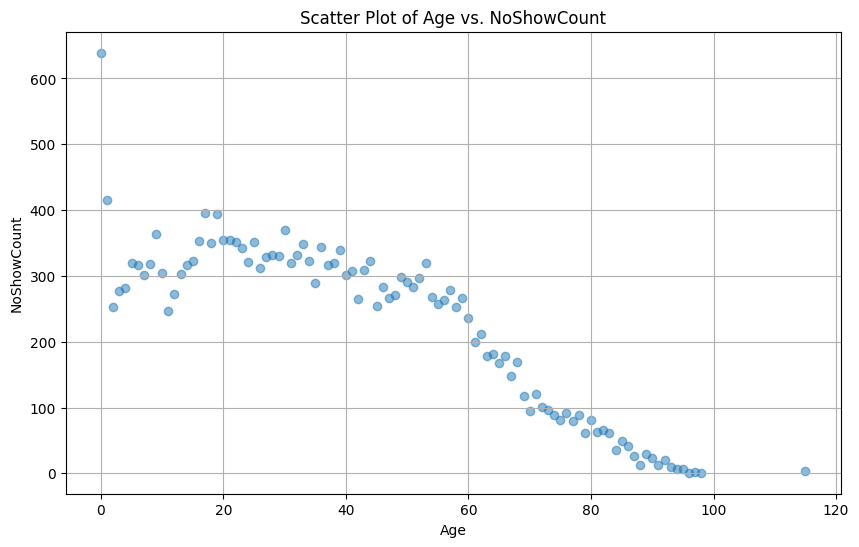

In [49]:
# Create a scatter plot between age and NoShowCount
plt.figure(figsize=(10, 6))
plt.scatter(no_show_counts['Age'], no_show_counts['NoShowCount'], alpha=0.5)
plt.title('Scatter Plot of Age vs. NoShowCount')
plt.xlabel('Age')
plt.ylabel('NoShowCount')
plt.grid(True)
plt.show()

### Research Question 2  (Is there any patient who frequently schedules appointments but often does not show up?)

In [50]:
no_show_counts = df_no_show.groupby("PatientId").size().reset_index(name='count')

no_show_patients = no_show_counts[no_show_counts['count'] >= 1]

no_show_patients = no_show_patients.sort_values(by=['count'], ascending=False)


print(no_show_patients)

             PatientId  count
3067     1421986987763     18
15734  563513528548171     16
5146     5587789811398     15
15814  581197334462339     14
11288   65751443779385     13
...                ...    ...
6460     8286428863661      1
6461     8287415784154      1
6462     8293316819257      1
6463     8294382814324      1
17662  999658497754825      1

[17663 rows x 2 columns]


### Research Question 3 (What is the avg old for the patients who schedules an appointments but does not show up?)

In [51]:
df_no_show["Age"].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

### visulaize a hist plot to displays the distribution for Age column

<AxesSubplot: >

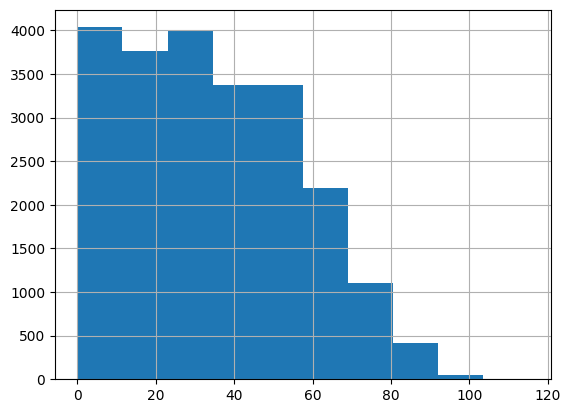

In [62]:
df_no_show["Age"].hist()

### Research Question 4 ( What is the Neighbourhood for the patient who scheduled an appointment but does not show up? Is there an issue with that Neighbourhood if it's frequently repeated for multiple patients for the same Neighbourhood)

In [52]:
no_show_date_counts = df_no_show.groupby(['AppointmentDay','Neighbourhood']).size().reset_index(name='count')


frequent_no_show_patients = no_show_date_counts[no_show_date_counts['count'] >= 1]

frequent_no_show_patients = frequent_no_show_patients.sort_values(by=['count'], ascending=False)


print(frequent_no_show_patients)

                AppointmentDay   Neighbourhood  count
535  2016-05-10 00:00:00+00:00  JARDIM CAMBURI     86
122  2016-05-02 00:00:00+00:00     RESISTÊNCIA     84
1035 2016-05-19 00:00:00+00:00  JARDIM CAMBURI     79
465  2016-05-09 00:00:00+00:00  JARDIM CAMBURI     78
821  2016-05-16 00:00:00+00:00  JARDIM CAMBURI     76
...                        ...             ...    ...
1122 2016-05-20 00:00:00+00:00         PIEDADE      1
1477 2016-06-01 00:00:00+00:00        NAZARETH      1
1130 2016-05-20 00:00:00+00:00    SANTA HELENA      1
732  2016-05-13 00:00:00+00:00      ESTRELINHA      1
231  2016-05-04 00:00:00+00:00  ENSEADA DO SUÁ      1

[1872 rows x 3 columns]


### Research Question 5 (does the Patients who does not show up to the appointment received a message before his appointment? if No what is the date on which the appointment was scheduled for him?)

In [53]:
no_show_receive_msg_counts = df_no_show.groupby('SMS_received').size().reset_index(name='Patients')

frequent_no_show_patients = no_show_receive_msg_counts[no_show_receive_msg_counts['Patients'] > 1]

frequent_no_show_patients

,SMS_received,Patients
0,False,12535
1,True,9784


### Plot a bar plot to show the precantge between male and female 

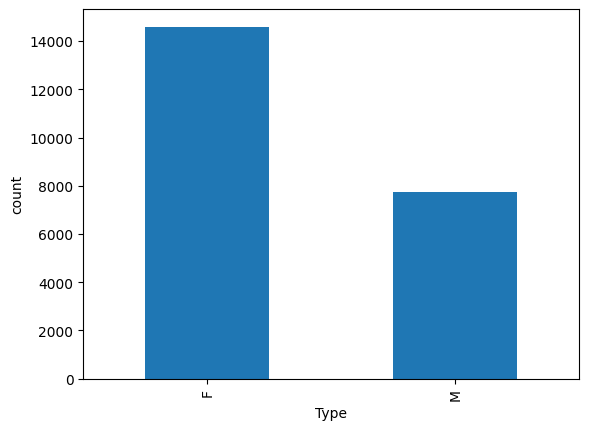

In [66]:
df_no_show["Gender"].value_counts().plot(kind='bar', xlabel="Type", ylabel="count"); 

<a id='conclusions'></a>
### <span style="color:purple"> Step 4: Conclusions </span>
after deep dive in the data, understand variabels and find the correlations i ended up with this result
#### q1:-
* appointments scheduled on Mondays or during holidays might have higher no-show rates. so **Date** is important
* Younger or older patients might have higher no-show rates. age is **also** importnat
* No-show History: **Patients who have a history of missing appointments** are likely to continue this behavior.
  * Note:- can we added a flag on this patient in order to notify him when he/she request a new appointment later 

#### q2:-
* yes there's many patinets have a Frequency of Appointments: as a solution Patients who schedule appointments frequently but often do not show up can be identified and flagged for additional appointments.

#### q3:-
*  i just asked this question in order to check if the Patient who register is a Younger. So we can just accept the regisration from older people

#### q4:-
* yes i have nnoticed that there's many Neighbourhood with no show up patient repted
* Example and idea:- we can check if there's an issue in JARDIM CAMBURI during **May** maype inside this area or city since there's a lot of no show up appear in this month


#### q5:-
* about 12535 user was not recive a message before his appointmant -> so sending a message is very important


## Submitting your Project 

In [67]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 415724 bytes to Investigate_a_Dataset.html
